In [1]:
import edd_utils as eddu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import random
from adjustText import adjust_text 
random.seed(1)

#.csv files preprocessed here for ease of access
df_log2=pd.read_csv('Log2.csv')
df_log10=pd.read_csv('Log10.csv')

#check headers
df_log2.head()
df_log10.head()

C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Protein  PP_0226_PP_0437_PP_0751-R1  PP_0226_PP_0597_PP_4678-R1  \
0  sp|A9GAJ9                    1.773666                    0.637098   
1  sp|O77727                    1.773666                    0.637098   
2  sp|O82803                    1.773666                    0.637098   
3  sp|O85207                    1.773666                    0.637098   
4  sp|P00552                    0.257014                    0.938251   

   PP_0226_PP_0897_PP_5288-R1  PP_0226_PP_2339_PP_3365-R1  PP_0368_PP_0597-R1  \
0                    0.067433                    0.712044            1.604392   
1                    0.067433                    2.728048            1.604392   
2                    0.067433                    2.728048            1.604392   
3                    0.067433                    2.728048            1.604392   
4                    2.113957                    3.790241            0.072418   

   PP_0368_PP_0812_PP_0944-R1  PP_0368_PP_4191_PP_4192-R1  \
0                    0.065951                    0.339140   
1                    0.065951                    0.339140   
2                    0.065951                    0.339140   
3                    0.065951                    0.339140   
4                    3.851244                    0.292049   

   PP_0437_PP_0528_PP_3578-R1  PP_0437_PP_3365-R1  ...  \
0                    1.367960            0.172344  ...   
1                    0.011718            1.395833  ...   
2                    0.011718            0.172344  ...   
3                    0.011718            0.172344  ...   
4                    0.995722            0.834836  ...   

   PP_2213_PP_2471_PP_4266-R1  PP_2339_PP_4186-R1  PP_2471_PP_3754_PP_4667-R1  \
0                    1.615782            0.385016                    0.758611   
1                    1.615782            0.385016                    0.758611   
2                    1.615782            0.385016                    0.758611   
3                    1.615782            0.385016                    0.758611   
4                    0.387861            1.777775                    0.095559   

   PP_3123_PP_3755-R1  PP_3123_PP_4667-R1  PP_3123_PP_4862_PP_5186-R1  \
0            1.215493            1.361549                    1.992765   
1            1.215493            0.061778                    1.992765   
2            1.215493            0.061778                    1.992765   
3            1.215493            0.061778                    1.992765   
4            2.016959            0.496946                    0.400940   

   PP_3123_PP_5288-R1  PP_3365_PP_3754-R1  PP_4122_PP_4188-R1  \
0            0.938258            0.263324            0.489151   
1            1.214189            0.263324            0.489151   
2            1.214189            0.263324            0.489151   
3            1.214189            0.263324            0.489151   
4            0.808208            0.267044            2.702123   

   PP_4189_PP_4550_PP_4862-R1  
0                    0.944703  
1                    0.944703  
2                    0.944703  
3                    0.944703  
4                    0.271440  

[5 rows x 61 columns]

In [24]:
#Get the common column names between the two DataFrames
common_columns = list(set(df_log2.columns[1:]) & set(df_log10.columns[1:]))

print(common_columns)

['PP_0814_PP_3123-R1', 'PP_0658_PP_0815_PP_4187-R1', 'PP_0226_PP_0897_PP_5288-R1', 'PP_0813_PP_1769_PP_4191-R1', 'PP_3123_PP_3755-R1', 'PP_0226_PP_0437_PP_0751-R1', 'PP_0814_PP_1769-R1', 'PP_1620_PP_4116-R1', 'PP_3365_PP_3754-R1', 'PP_0814_PP_5288-R1', 'PP_0814_PP_4192-R4', 'PP_0999_PP_3578_PP_5186-R1', 'PP_3123_PP_4862_PP_5186-R1', 'PP_0751_PP_1620_PP_4678-R1', 'PP_3123_PP_4667-R1', 'PP_0814_PP_4192-R1', 'PP_0437_PP_4116-R1', 'PP_1444_PP_4189_PP_4191-R1', 'PP_0226_PP_0597_PP_4678-R1', 'PP_0812_PP_4121-R1', 'PP_1319_PP_1457_PP_4192-R1', 'PP_2112_PP_4189_PP_5186-R1', 'PP_2213_PP_2471_PP_4266-R1', 'PP_4122_PP_4188-R1', 'PP_1506_PP_4651_PP_4862-R1', 'PP_3123_PP_5288-R1', 'PP_0813_PP_4549_PP_5288-R1', 'PP_0814_PP_4862-R4', 'PP_0815_PP_1317-R1', 'PP_1607_PP_4550-R1', 'PP_4189_PP_4550_PP_4862-R1', 'PP_0813_PP_4120-R1', 'PP_0658_PP_1506_PP_3071-R1', 'PP_2137_PP_4116_PP_4187-R1', 'PP_1319_PP_4121_PP_4667-R1', 'PP_2112_PP_4188_PP_4862-R1', 'PP_2137_PP_4011_PP_4120-R1', 'PP_0437_PP_3365-R1', 'PP

1


<Figure size 400x300 with 0 Axes>

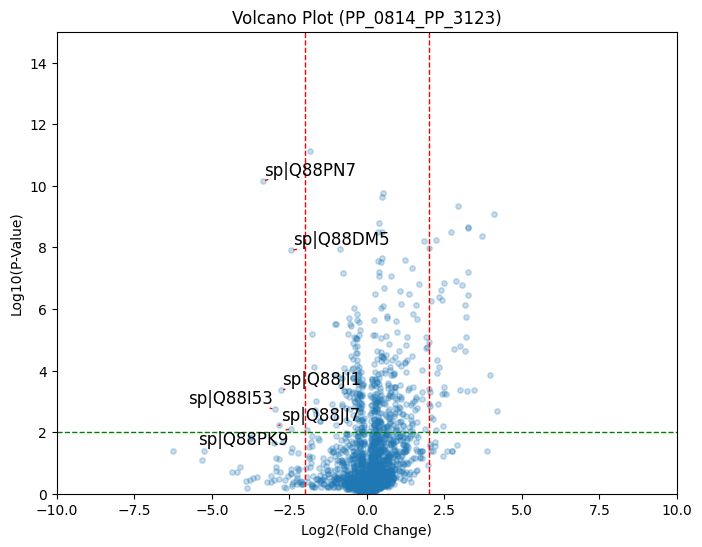

2


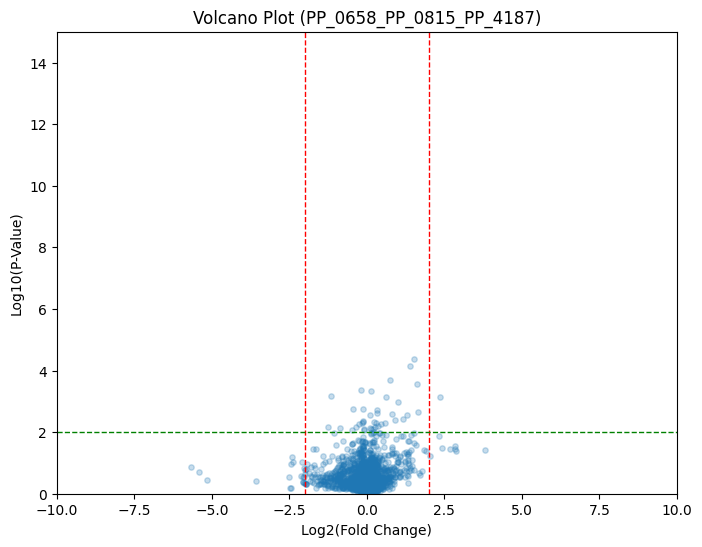

3


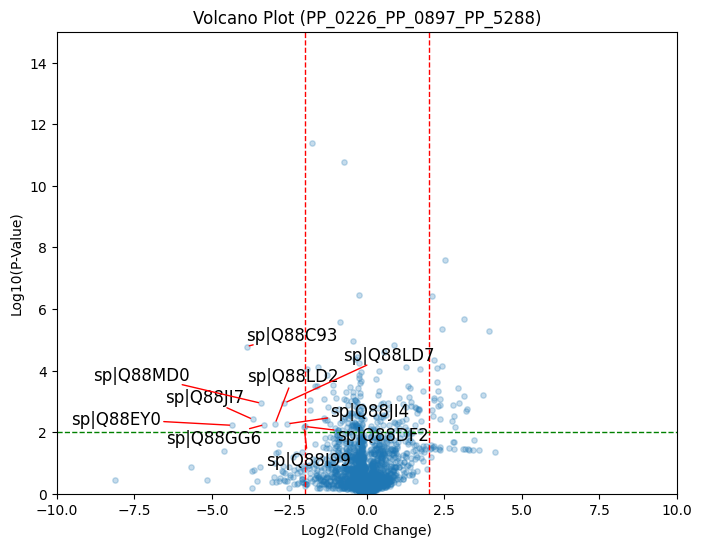

4


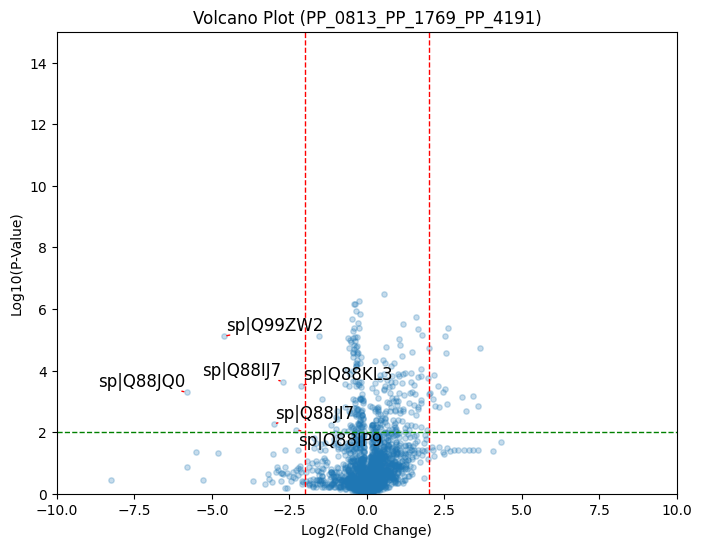

5


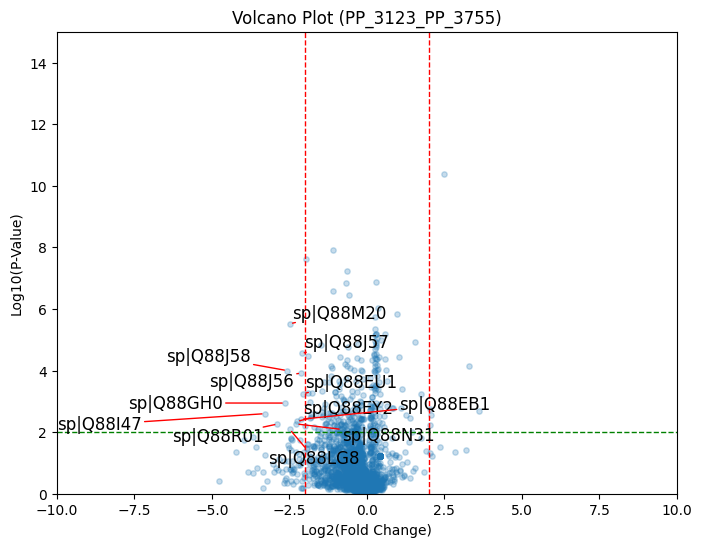

6


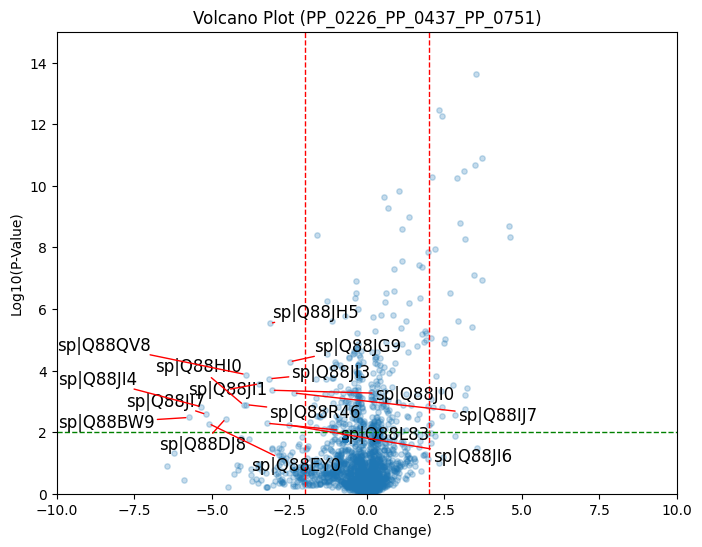

7


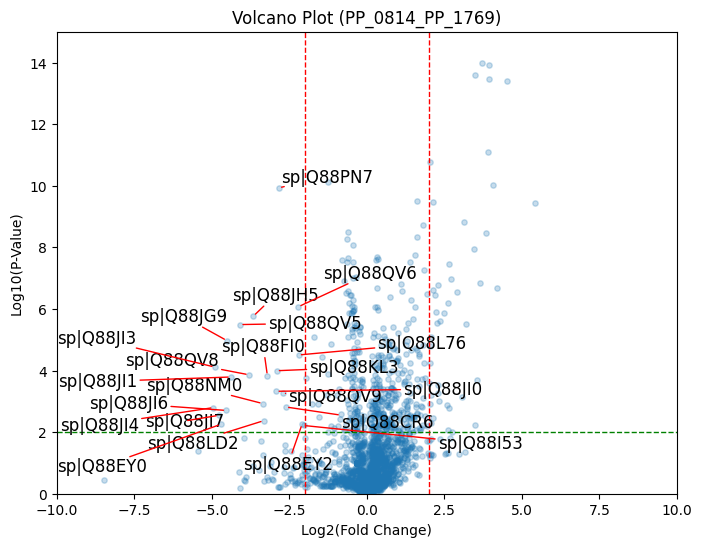

8


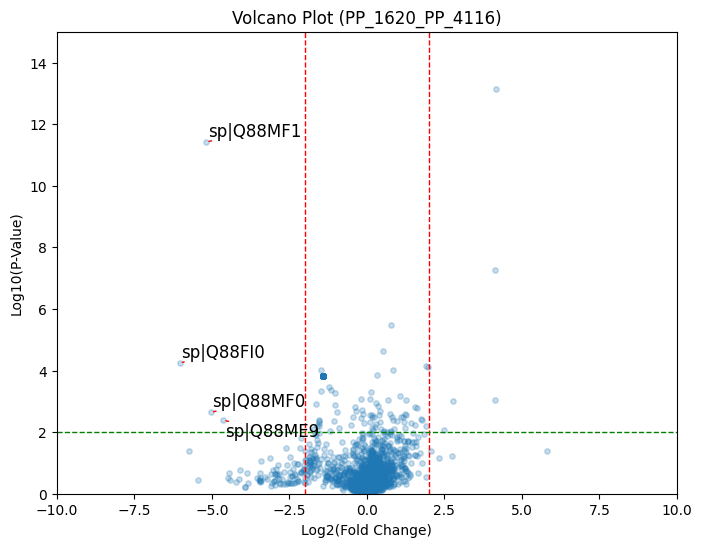

9


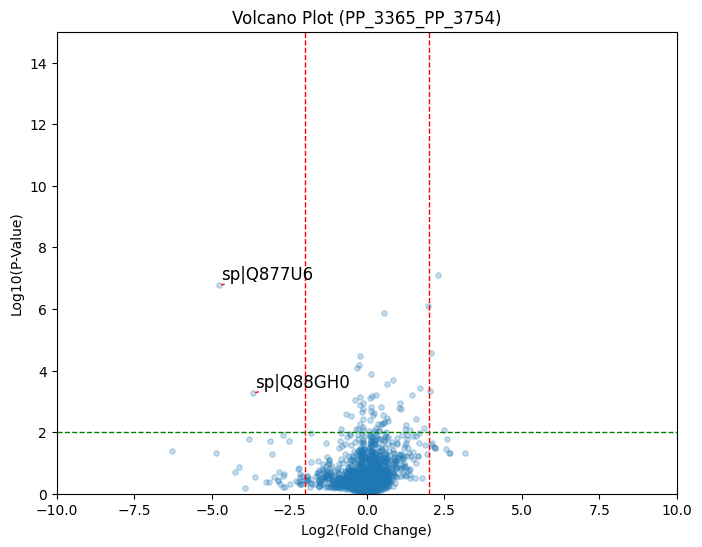

10


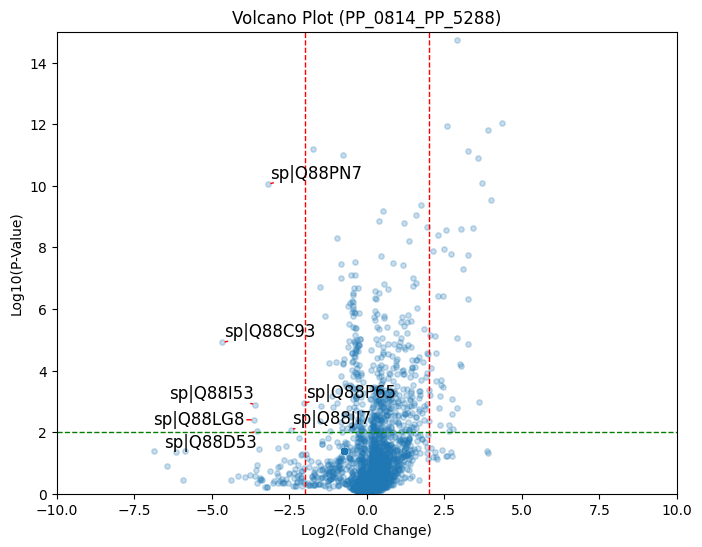

11


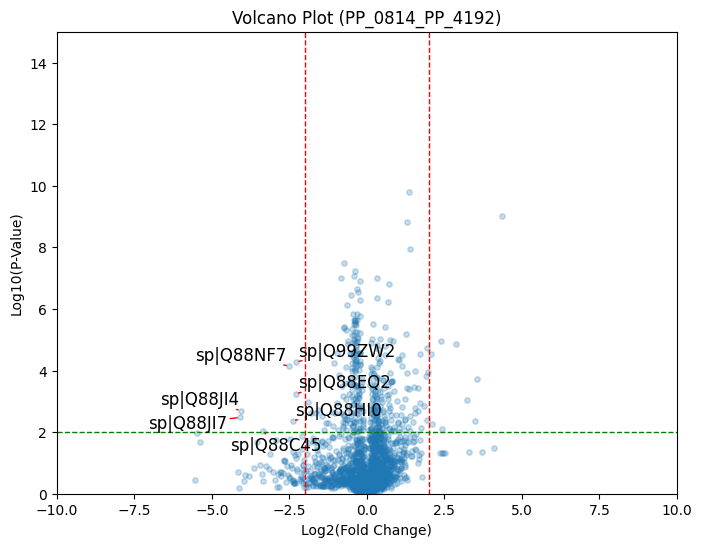

12


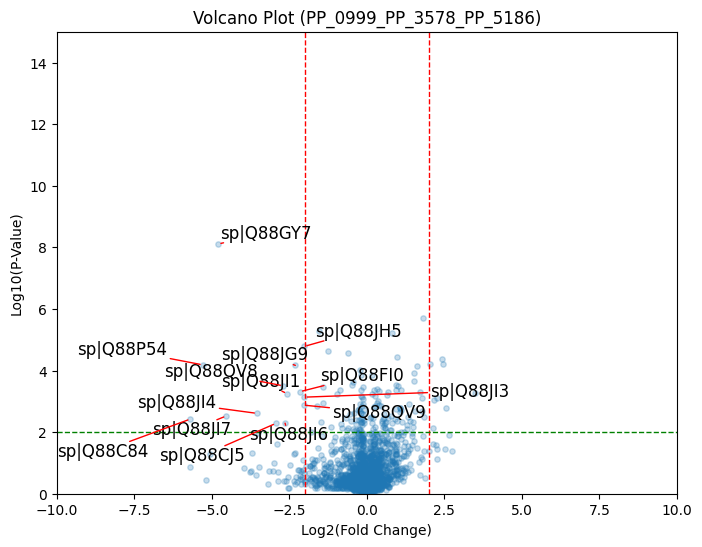

13


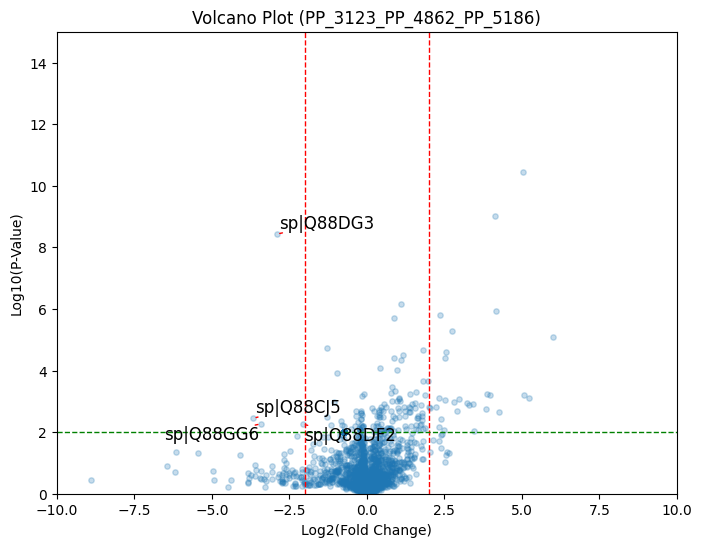

14


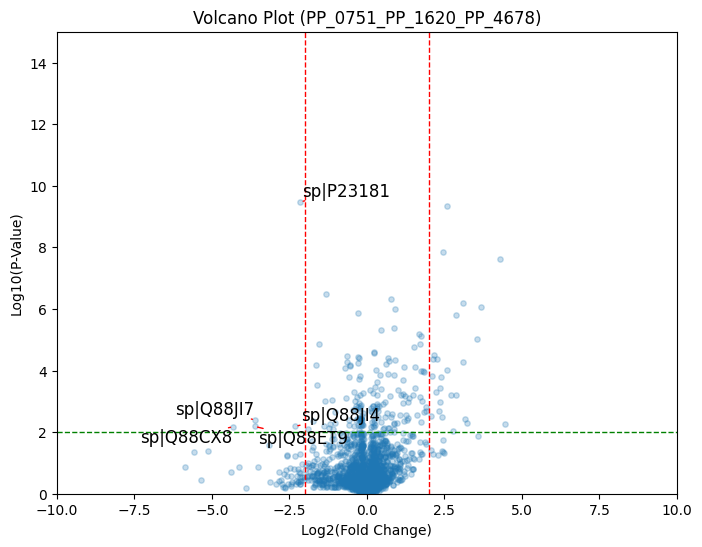

15


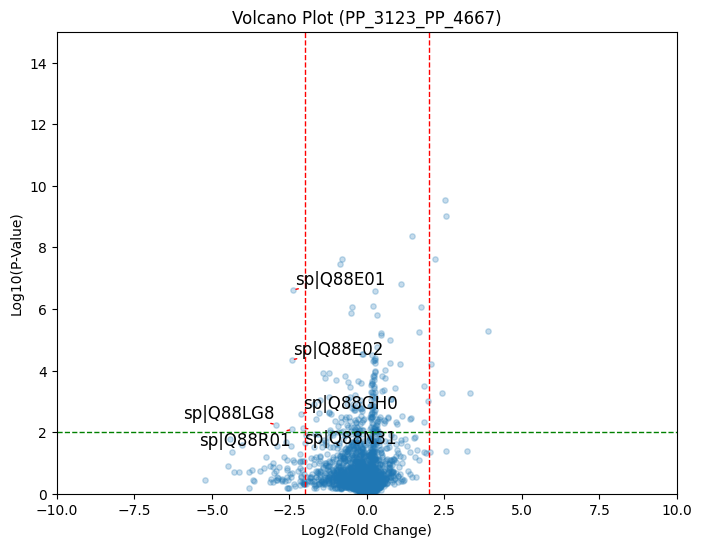

16


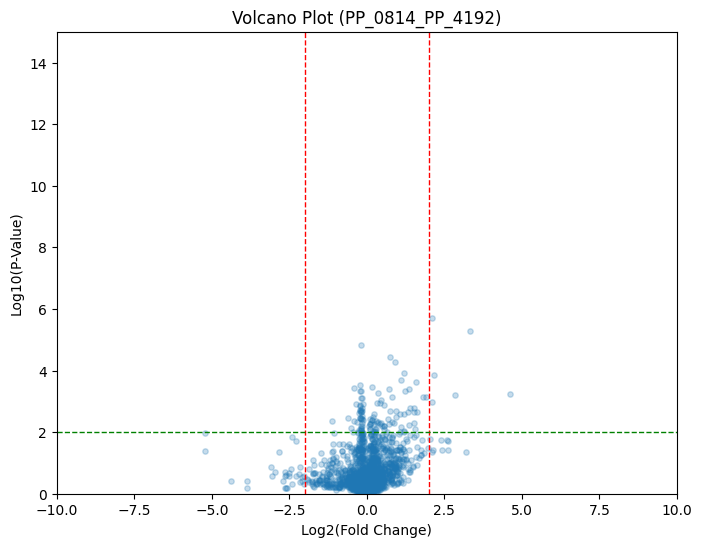

17


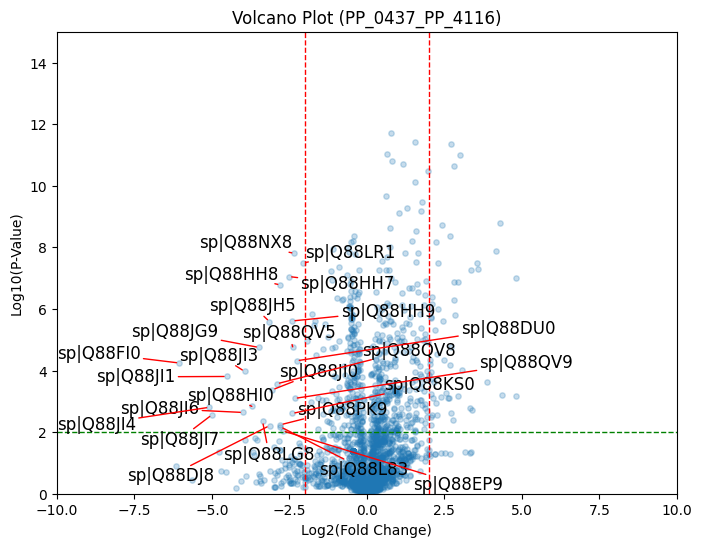

18


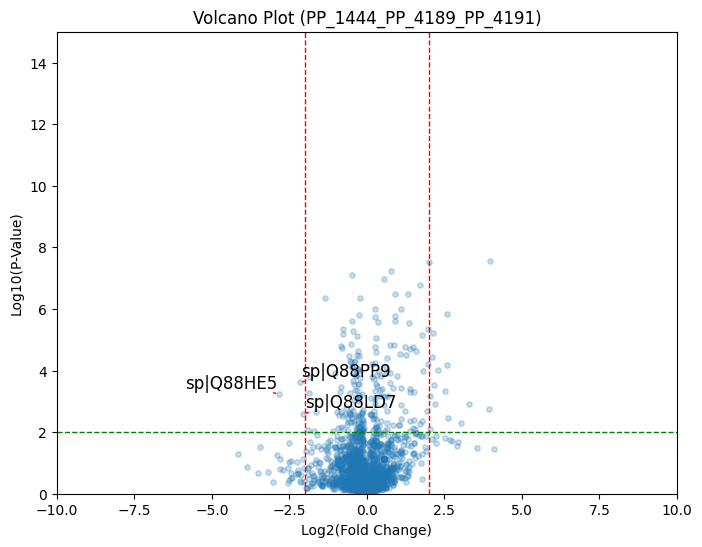

19


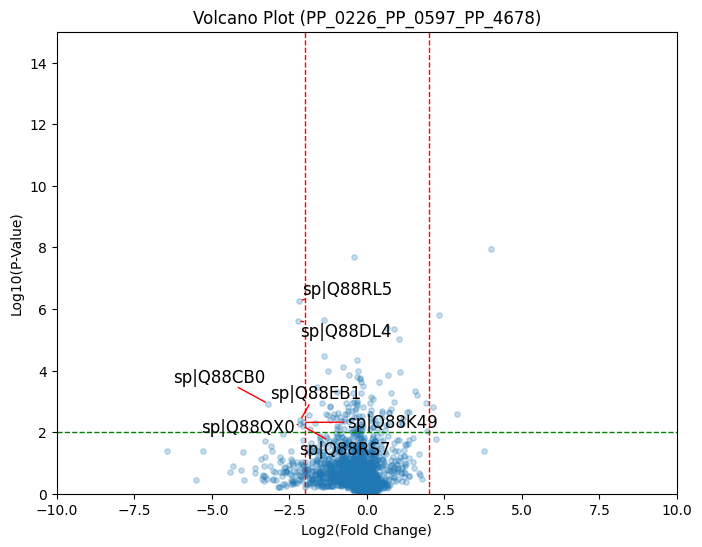

20


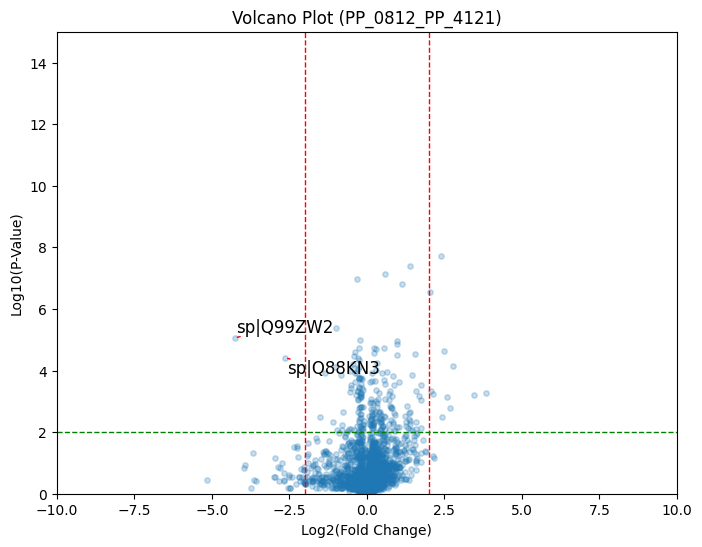

21


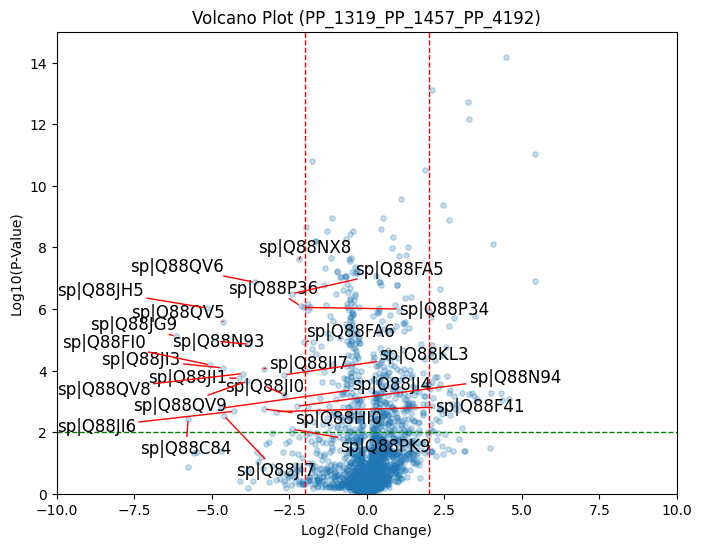

22


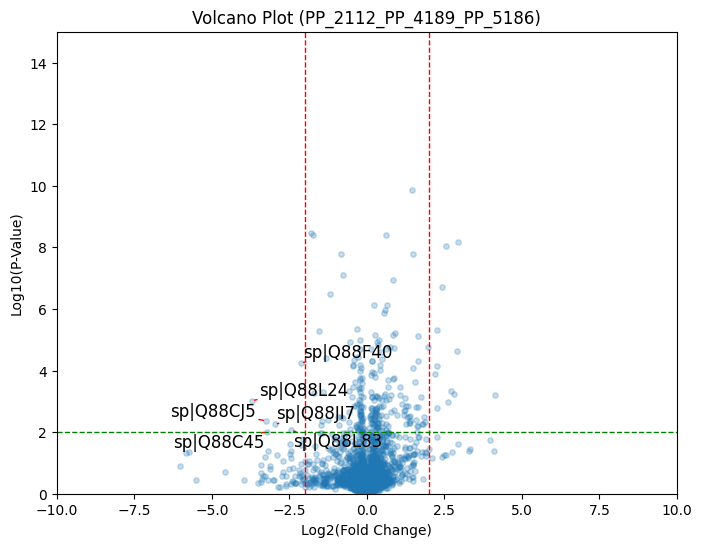

23


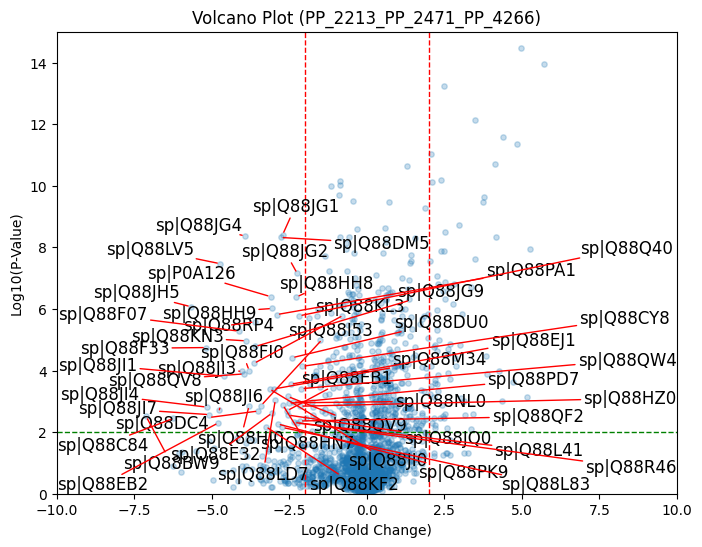

24


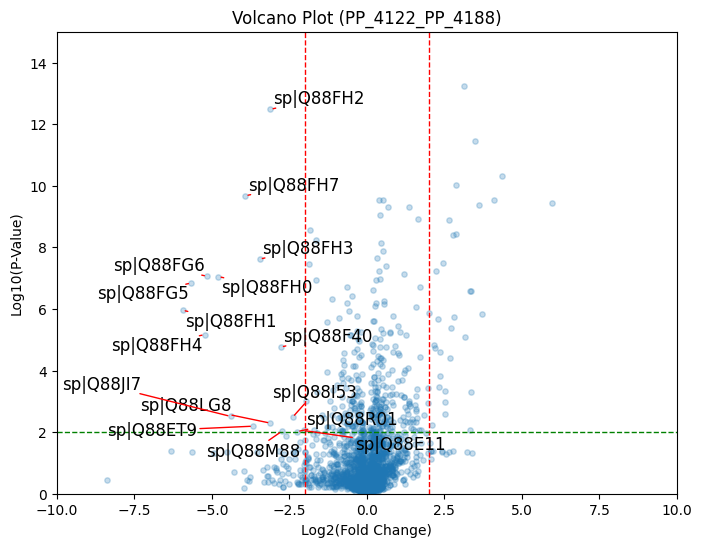

25


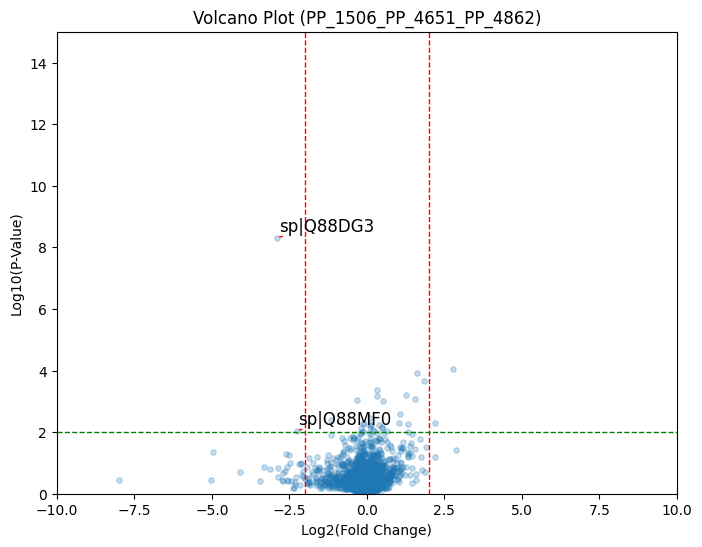

26


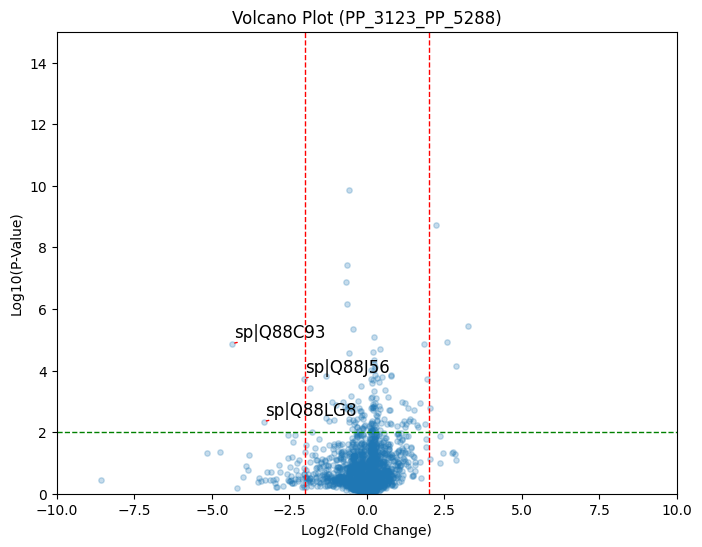

27


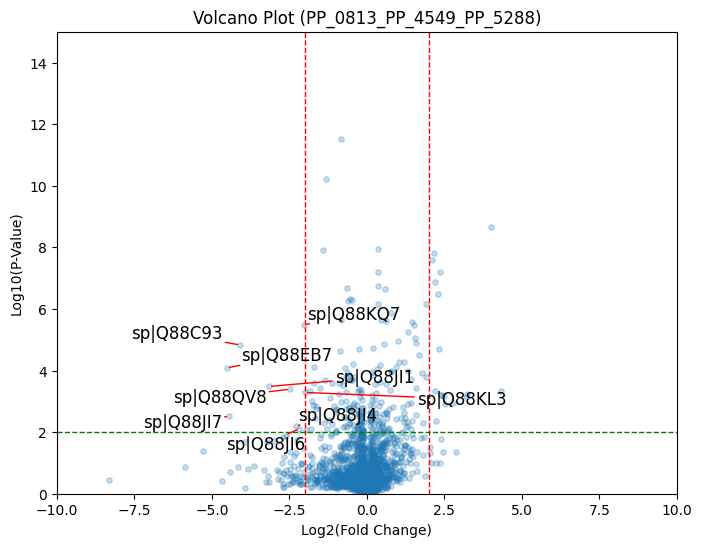

28


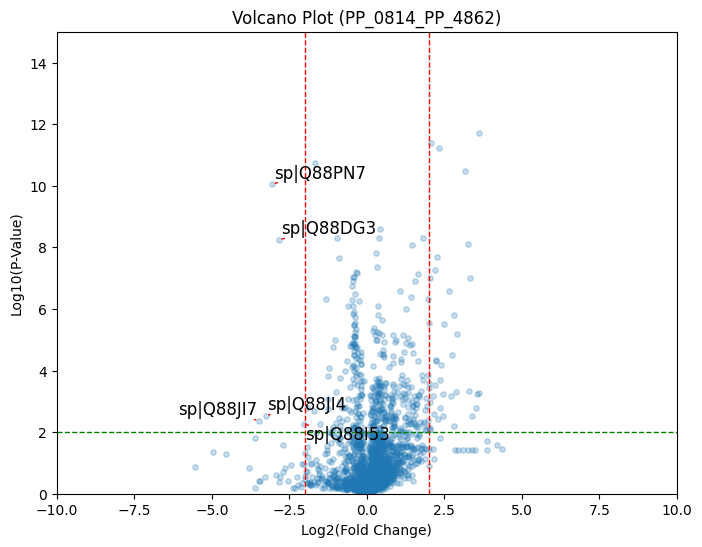

29


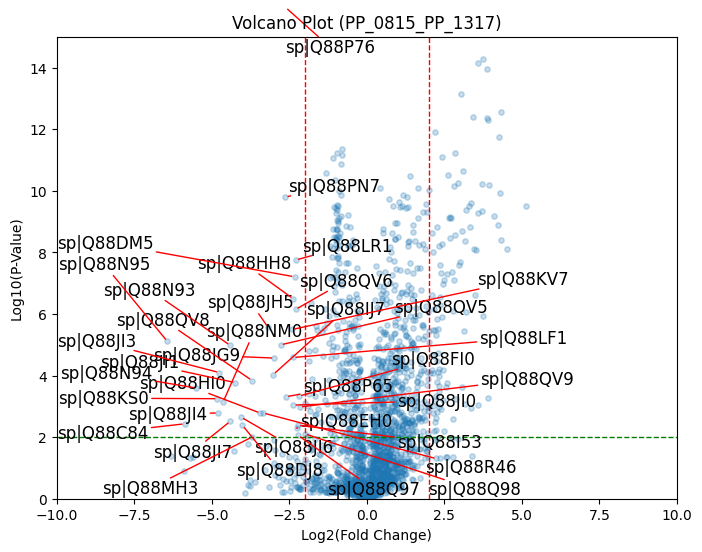

30


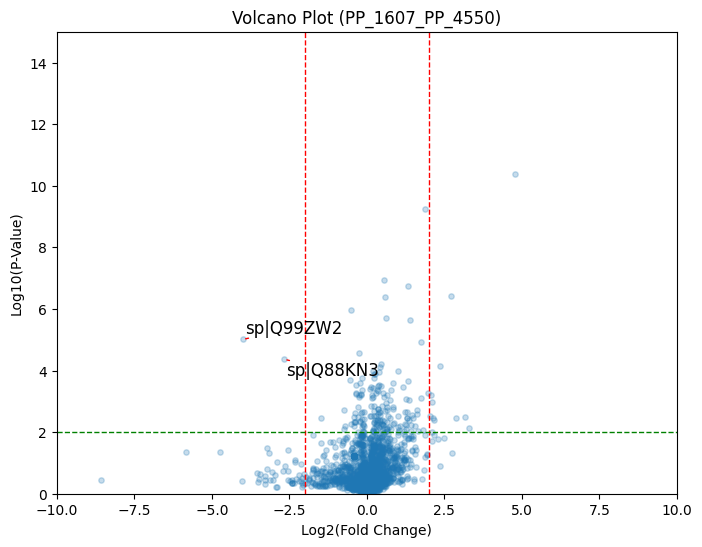

31


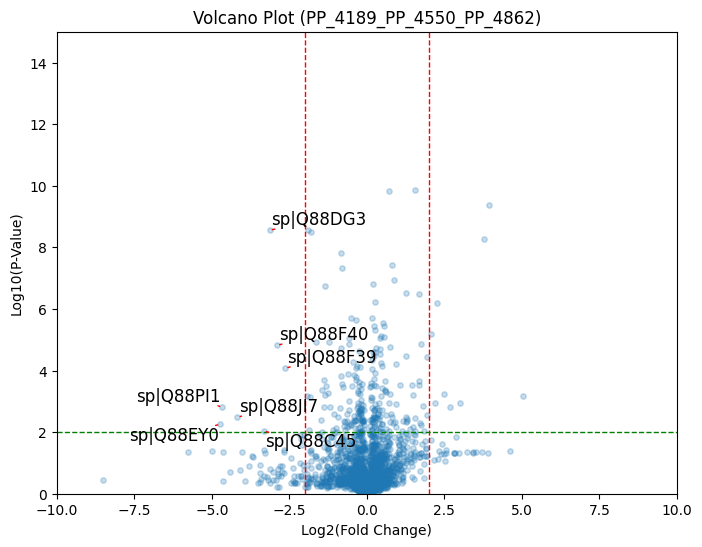

32


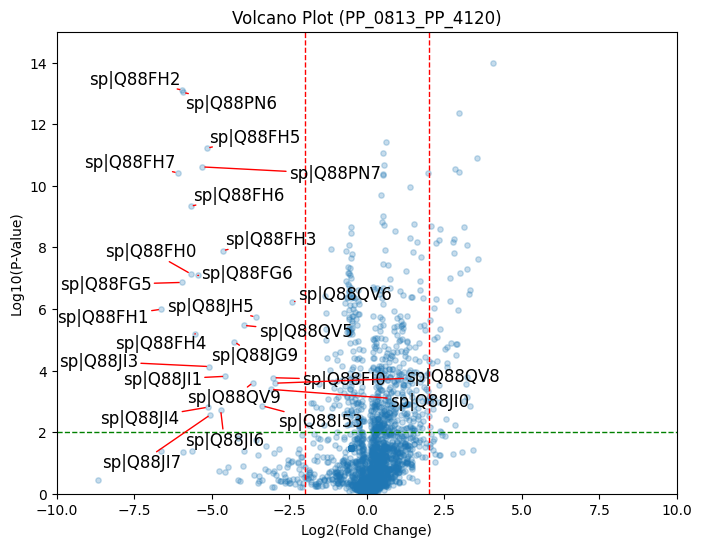

33


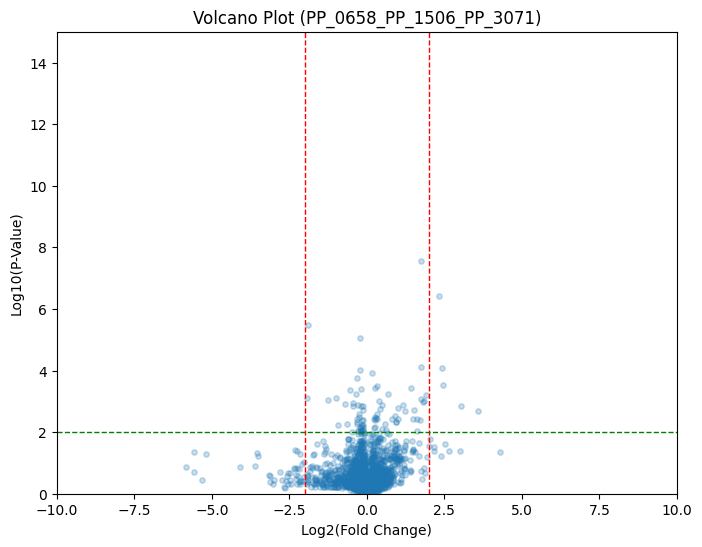

34


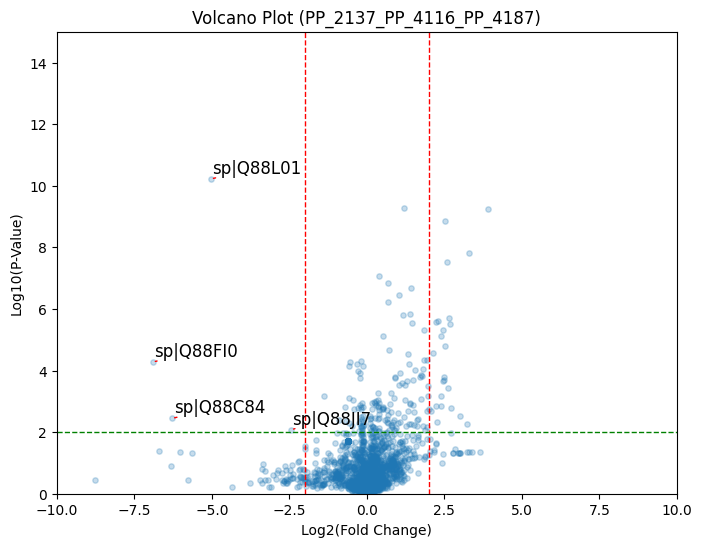

35


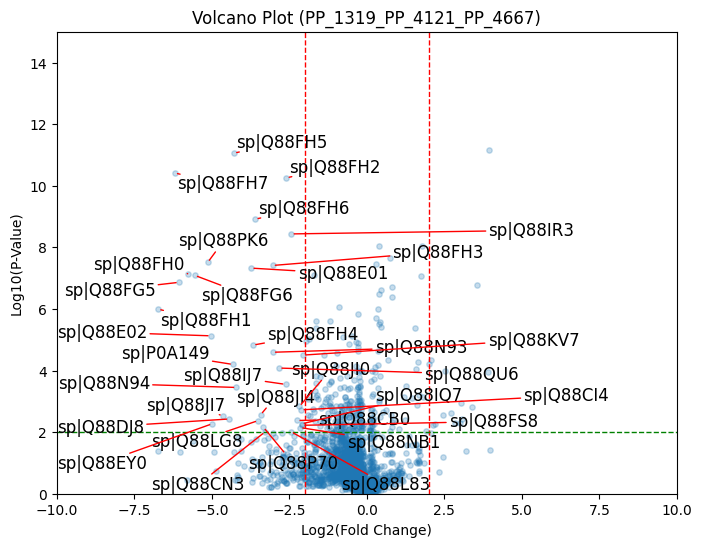

36


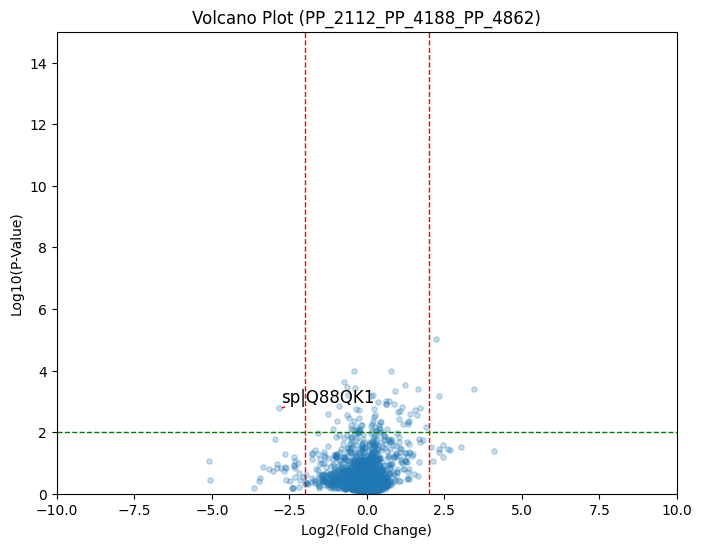

37


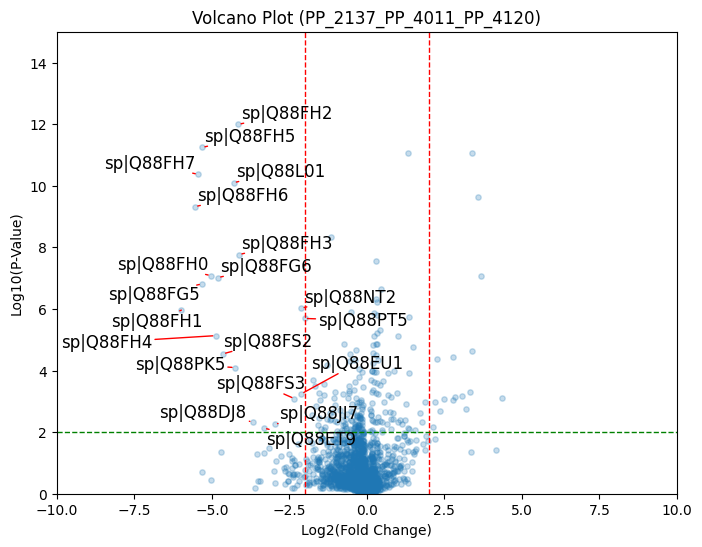

38


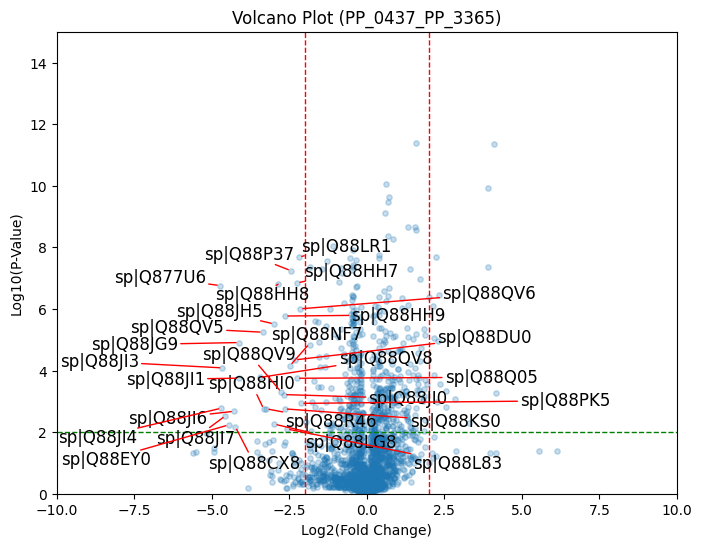

39


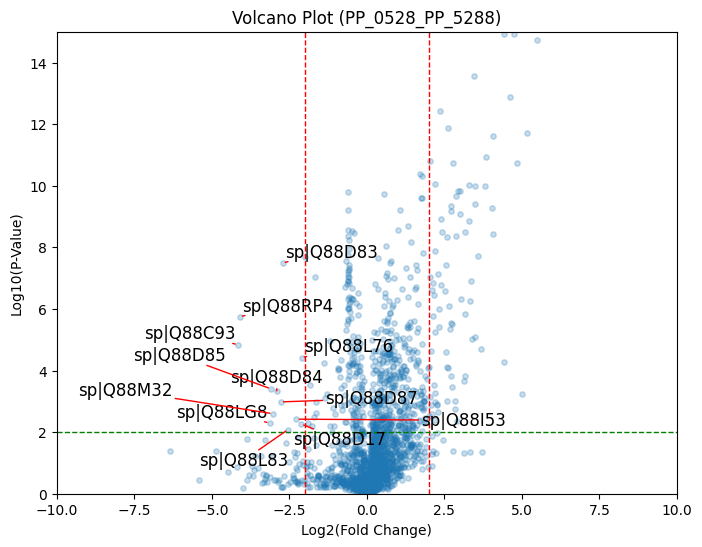

40


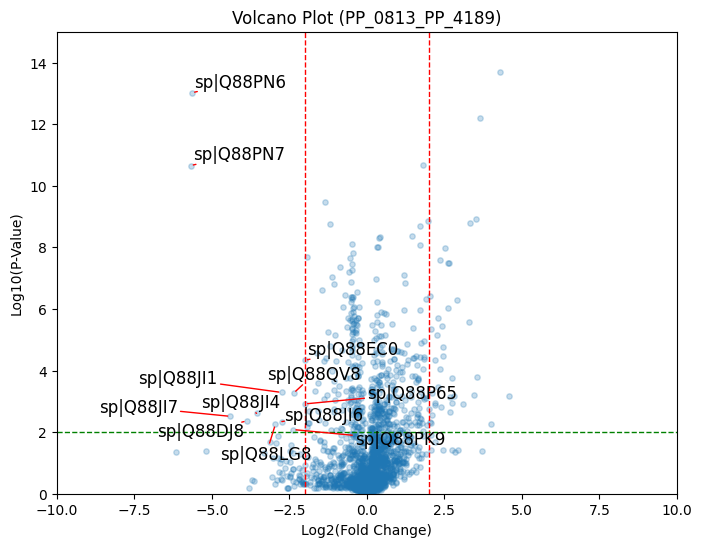

41


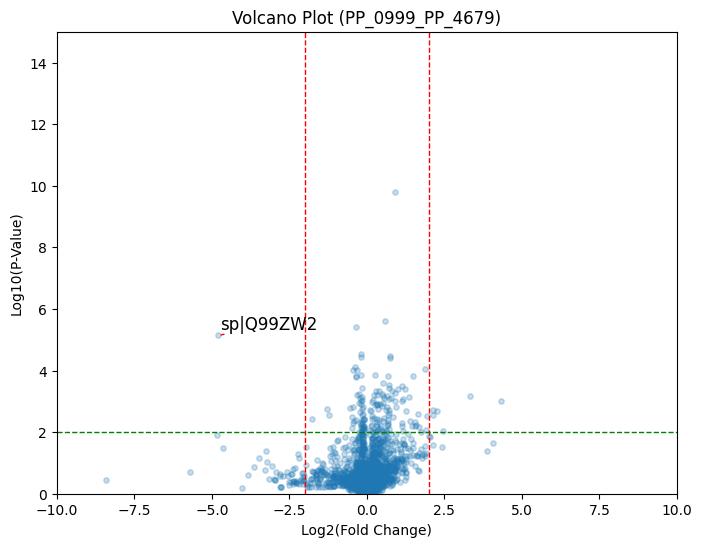

42


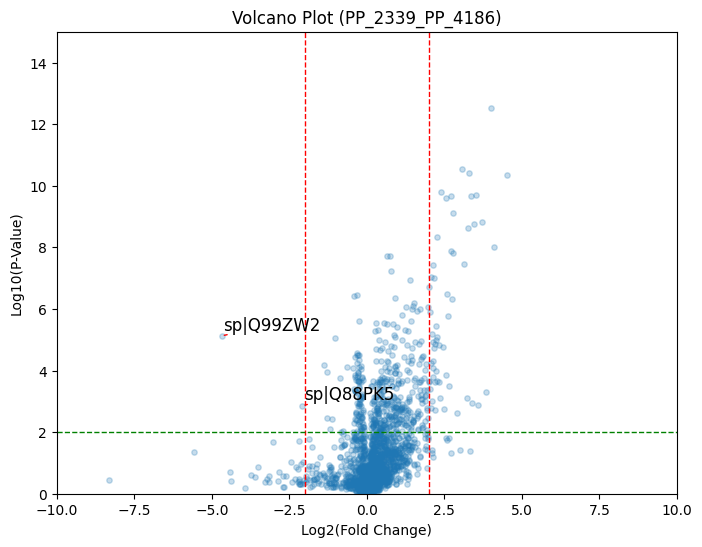

43


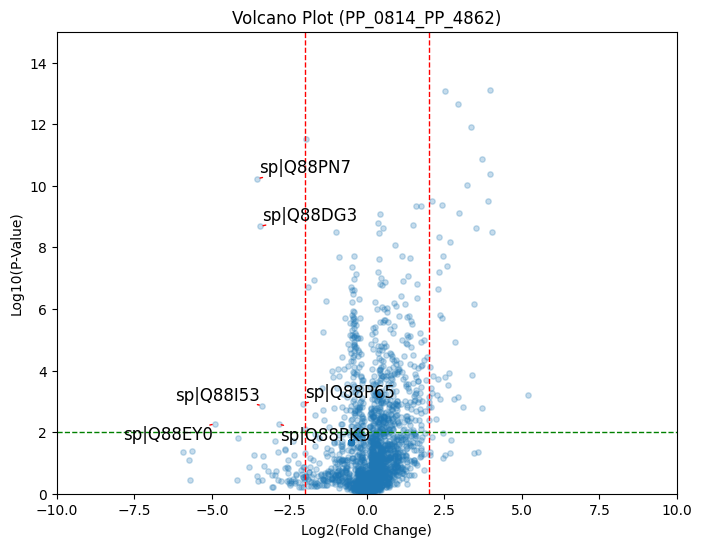

44


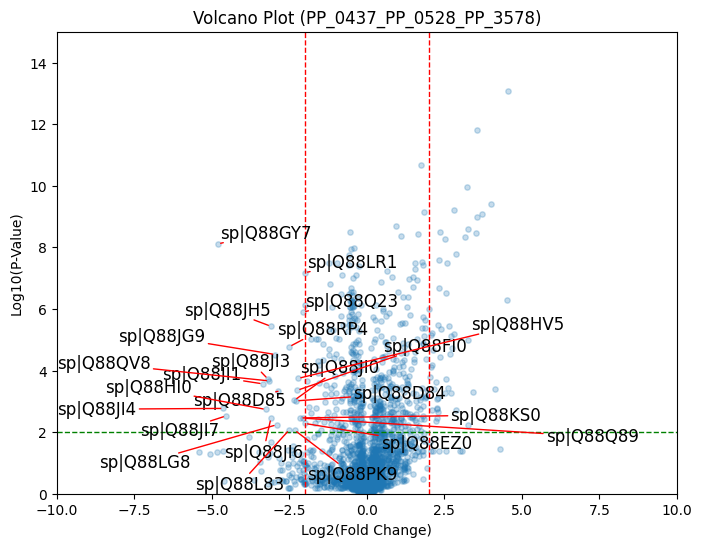

45


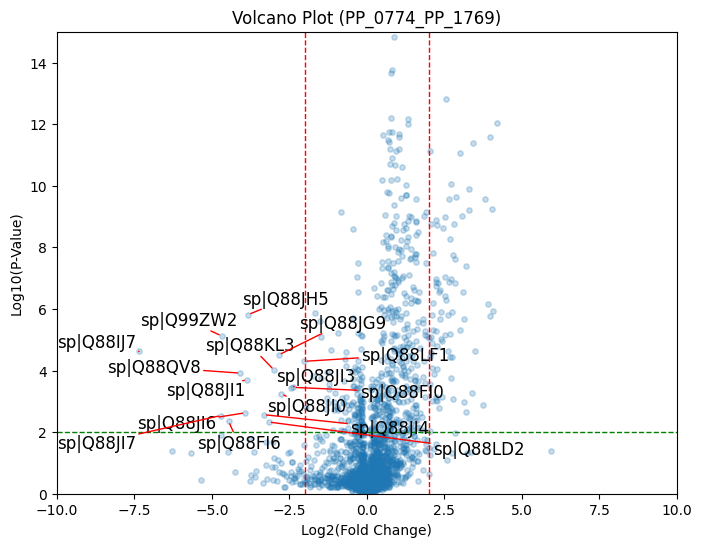

46


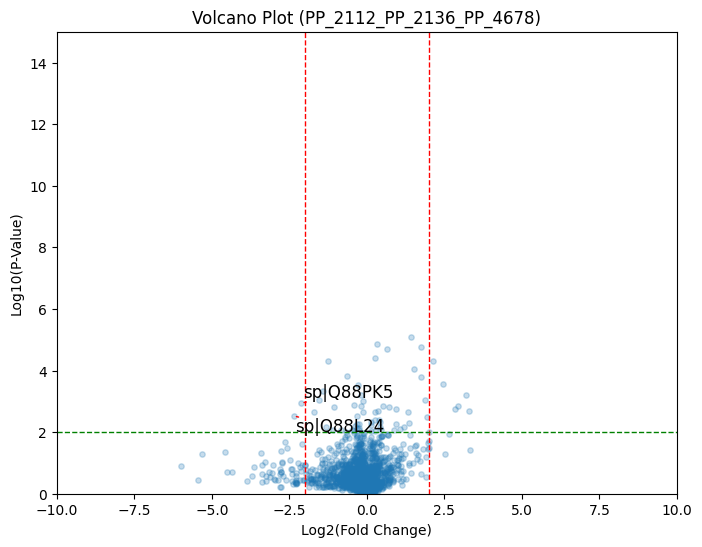

47


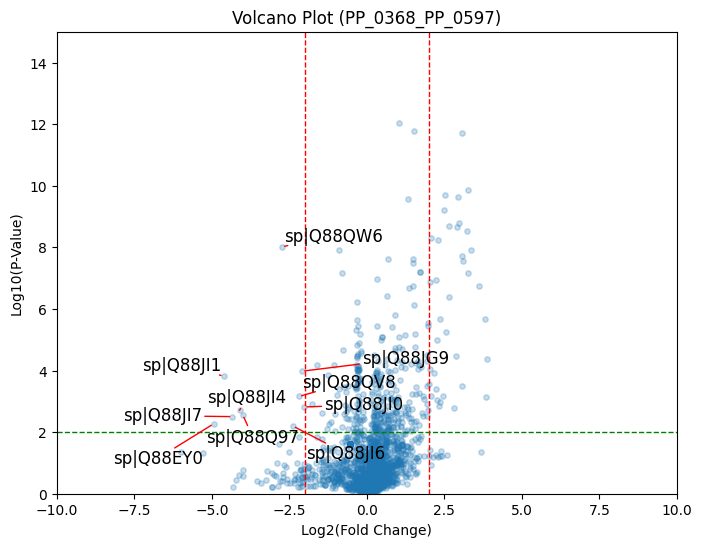

48


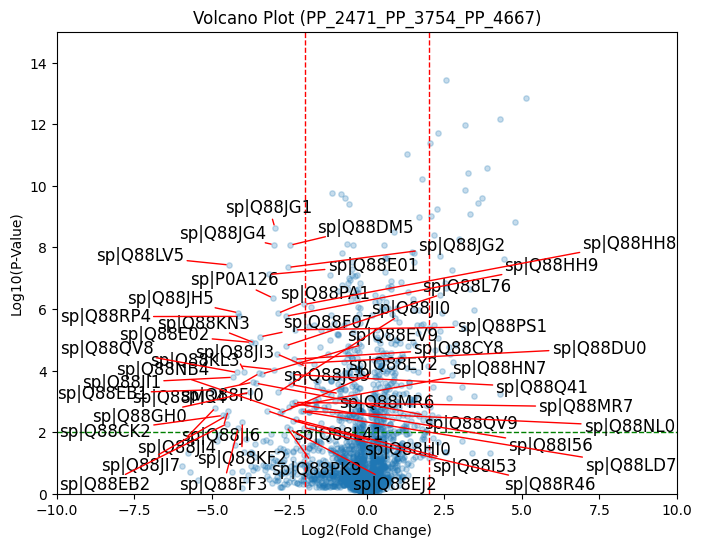

49


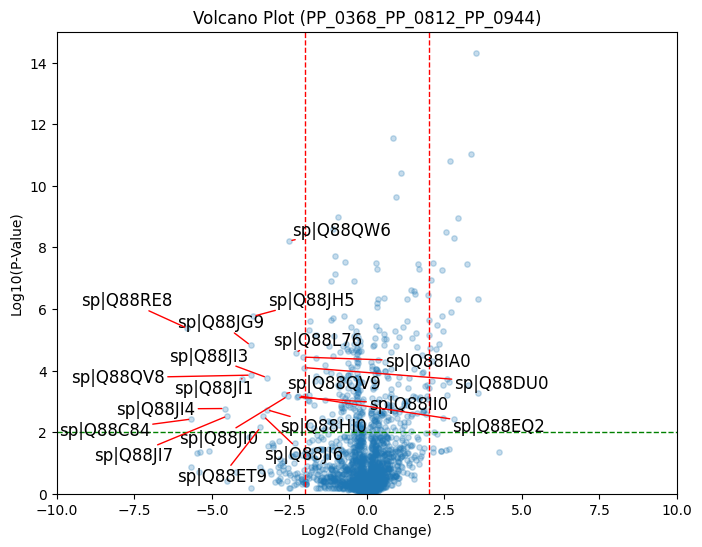

50


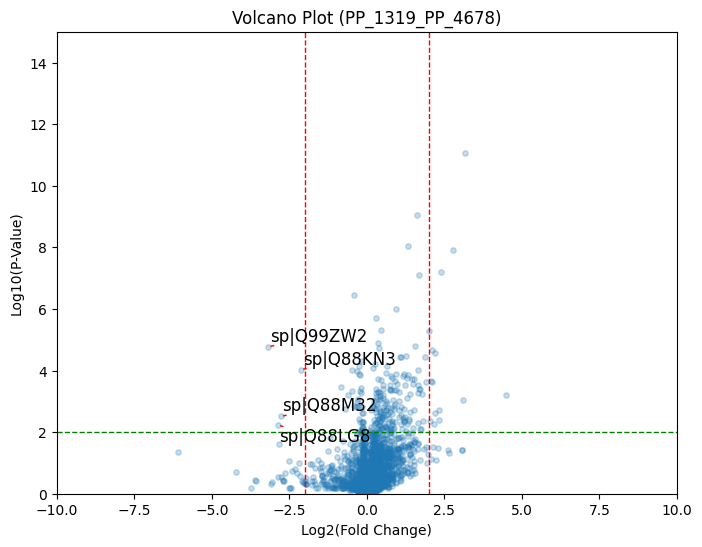

51


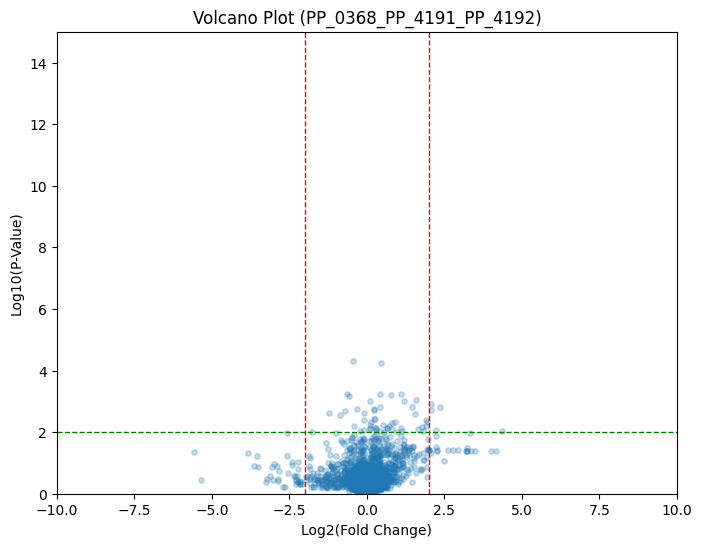

52


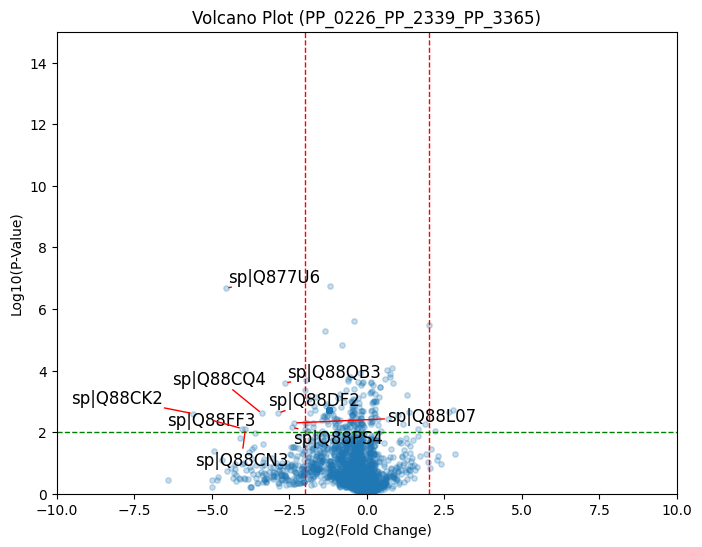

53


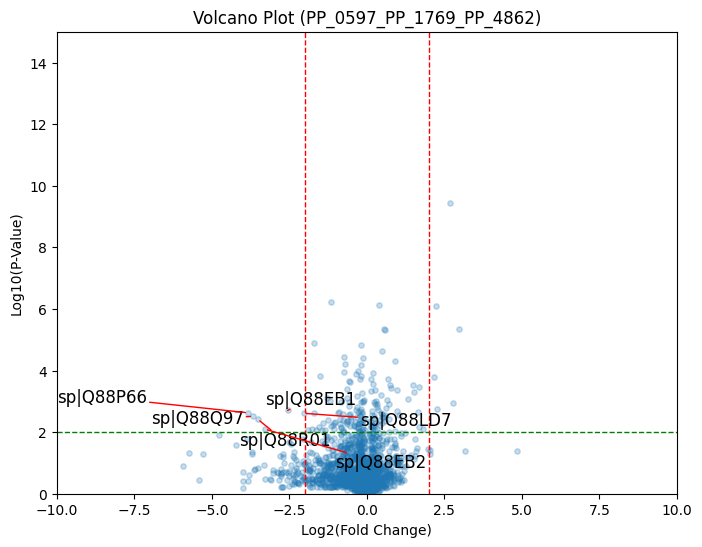

54


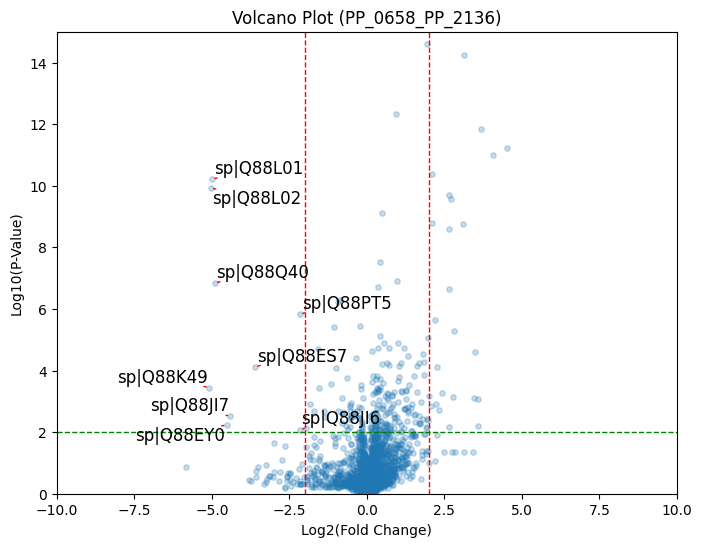

55


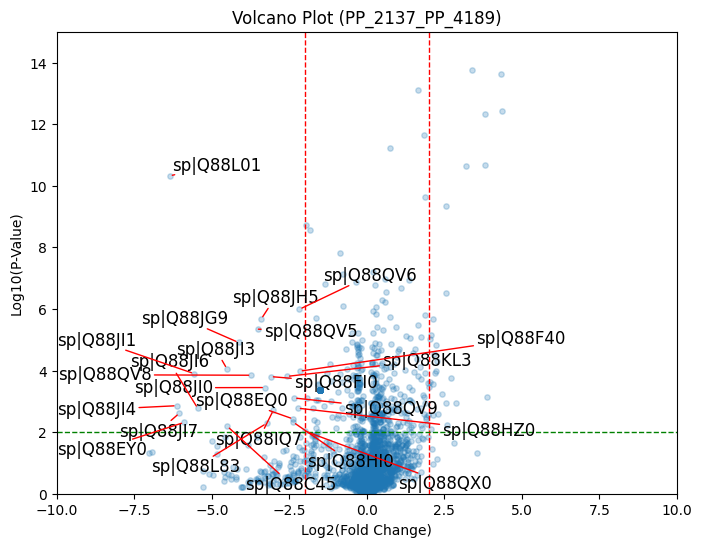

56


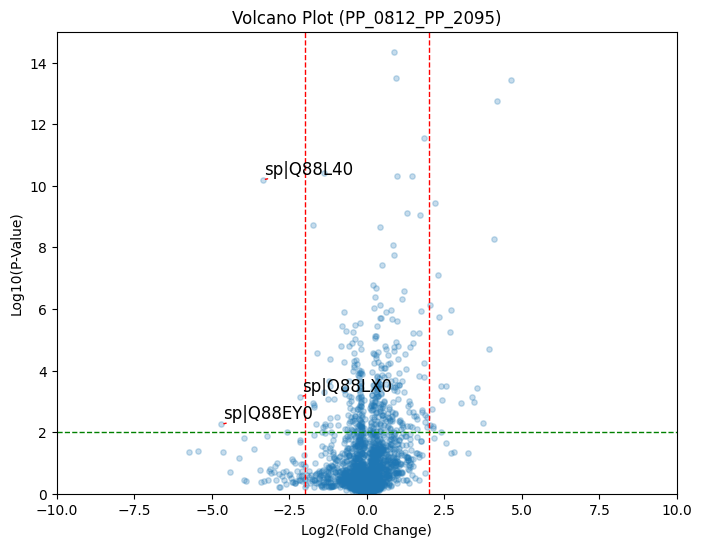

57


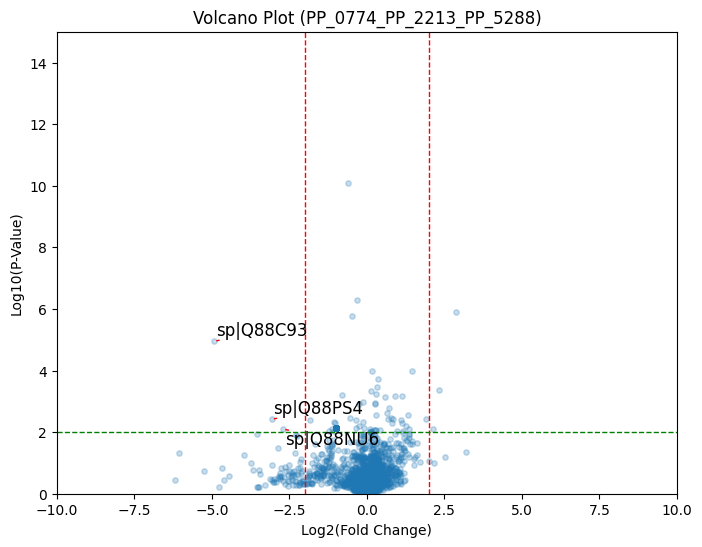

58


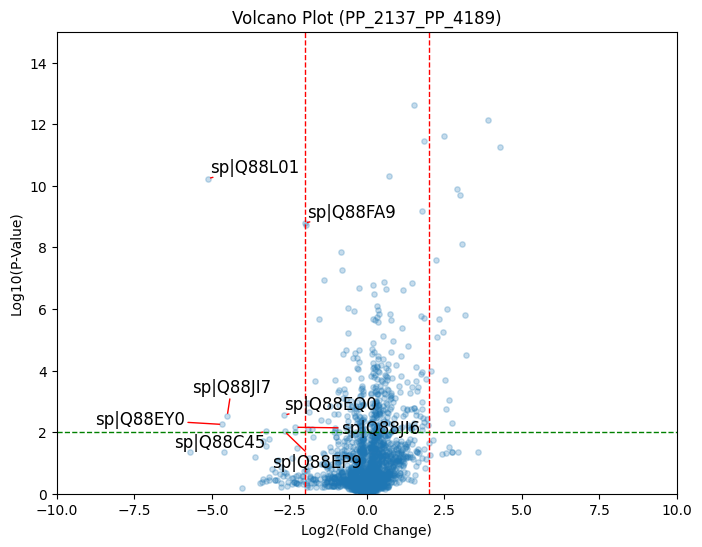

59


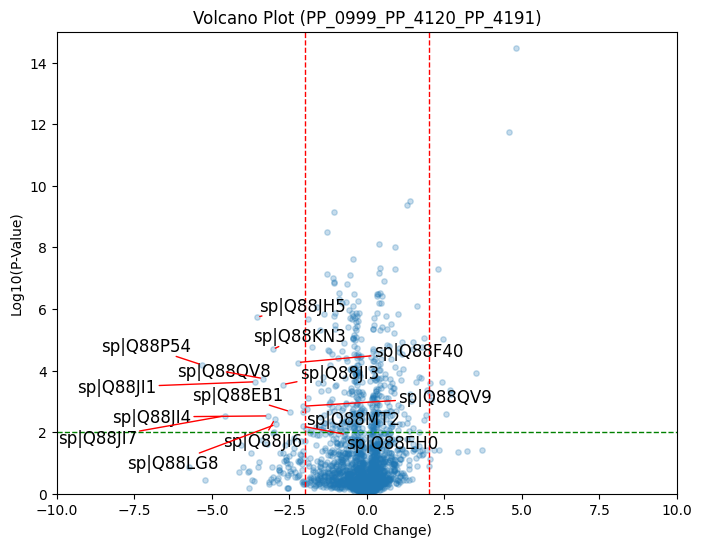

60


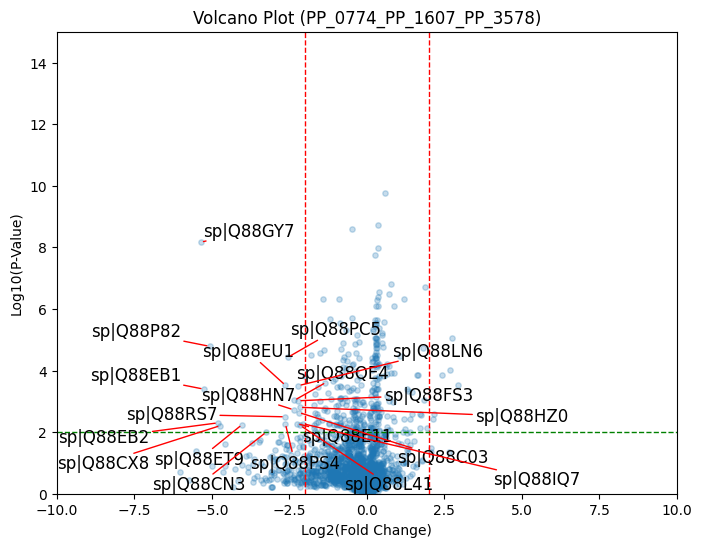

In [38]:
#Create a figure for the volcano plot
plt.figure(figsize=(4, 3))

#Iterate through common columns and create volcano plots
for k,column in enumerate(common_columns,start=1):
    fold_change = df_log2[column]
    p_values = df_log10[column]

    #Customize the volcano plot with fold change and p-values
    plt.figure(figsize=(8, 6))
    
    #Adjust marker size and transparency as needed
    plt.scatter(fold_change, p_values, s=15, alpha=0.25) 
    plt.title(f"Volcano Plot ({column[:-3]})")
    plt.xlabel("Log2(Fold Change)")
    plt.ylabel("Log10(P-Value)")
    plt.grid(False)
    plt.ylim(0,15)
    plt.xlim(-10,10)

    #Add horizontal and vertical lines to indicate  thresholds
    plt.axvline(x=2, color='r', linestyle='--', linewidth=1)
    plt.axvline(x=-2, color='r', linestyle='--', linewidth=1)
    #Example threshold for p-value p<0.01
    plt.axhline(y=-np.log10(0.01), color='g', linestyle='--', linewidth=1) 
    
    #Annotate the points with protein names and adjust for label overlap
    texts=[]
    labels = [df_log2.iloc[i, 0] for i in range(len(fold_change))]
    for i, label in enumerate(labels):
        if fold_change[i] < -2 and p_values[i] > -np.log10(0.01):
            text = plt.text(fold_change[i], p_values[i], label, fontsize=10) 
            texts.append(text)
            
    if texts:
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=1))
    
    #Print Figure #, total figures = 60 for 60 strains (some duplicates)
    print(k)
    
    #Show the volcano plot
    plt.show()